# DGLGraph and node/edge features

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

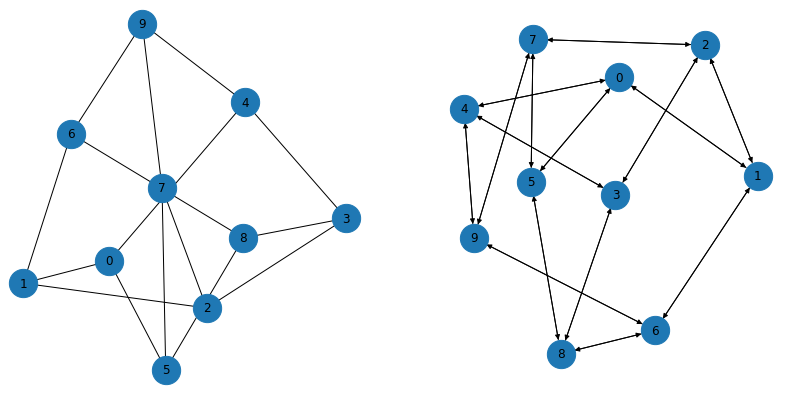

In [8]:
import networkx as nx
import dgl

g_nx = nx.petersen_graph()
g_dgl = dgl.from_networkx(g_nx)

plt.figure(figsize=(14,7))
plt.subplot(121)
nx.draw(g_nx, with_labels=True, node_size=800)
plt.subplot(122)
nx.draw(g_dgl.to_networkx(), with_labels=True, node_size=800)

plt.show()

There are many ways to construct a DGLGraph. Below are the allowed data types ordered by our recommendataion.

- A pair of arrays (u, v) storing the source and destination nodes respectively. They can be numpy arrays or tensor objects from the backend framework.
- **scipy sparse matrix** representing the adjacency matrix of the graph to be constructed.
- **networkx** graph object.
- A list of edges in the form of integer pairs.

In [13]:
import torch
import numpy as np
import scipy.sparse as spp

# Create a star graph from a pair of arrays (using ``numpy.array`` works too).
u = torch.tensor([0, 0, 0, 0, 0])
v = torch.tensor([1, 2, 3, 4, 5])
star1 = dgl.DGLGraph((u, v))

# Create the same graph from a scipy sparse matrix (using ``scipy.sparse.csr_matrix`` works too).
adj = spp.coo_matrix((np.ones(len(u)), (u.numpy(), v.numpy())))
star2 = dgl.DGLGraph(adj)

You can also create a graph by progressively adding more nodes and edges. Although it is not as efficient as the above constructors, it is suitable for applications where the graph cannot be constructed in one shot.

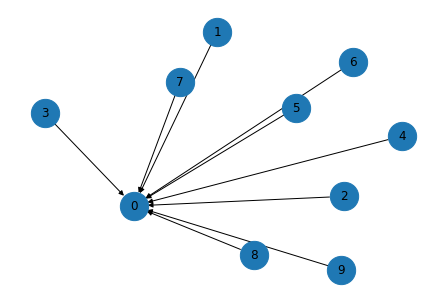

In [26]:
g = dgl.graph((np.empty(0), np.empty(0)))
g.add_nodes(10)

# add edges one by one
for i in range(1, 5):
    g.add_edge(i, 0)

# a few mor with a paired list
src = list(range(5, 8))
dst = [0] * 3
g.add_edges(src, dst)

# use a pair of tensors
src = torch.tensor([8, 9])
dst = torch.tensor([0, 0])
g.add_edges(src, dst)

# Edge broadcasting will do star graph in one go!
# Andrew: somehow this does not work
#g.clear(); g.add_nodes(10)
#src = th.tensor(list(range(1, 10)));
#g.add_edges(src, 0)

nx.draw(g.to_networkx(), with_labels=True, node_size=800)
plt.show()

# Assigning features

You can also assign features to nodes and edges of a DGLGraph. The features are represented as dictionary of names (strings) and tensors, called fields.

The following code snippet assigns each node a vector (len=3).

## Assigning node features

In [28]:
x = torch.rand(10, 3)
g.ndata['x'] = x
g.ndata['x']

tensor([[0.4317, 0.0650, 0.4851],
        [0.2157, 0.8913, 0.2110],
        [0.5439, 0.3397, 0.9118],
        [0.6885, 0.5654, 0.2376],
        [0.4386, 0.9262, 0.5657],
        [0.5459, 0.0649, 0.7927],
        [0.8773, 0.5406, 0.8483],
        [0.4384, 0.4412, 0.6972],
        [0.7974, 0.8883, 0.9595],
        [0.0286, 0.2246, 0.8871]])

In [38]:
g.ndata['x'][0] = torch.zeros(1, 3)
print(g.ndata['x'])
g.ndata['x'][[0, 1, 2, 7]] = torch.zeros(4, 3)
print(g.ndata['x'])
g.ndata['x'][torch.tensor([0, 1, 2])] = torch.randn((3, 3))
print(g.ndata['x'])

tensor([[ 0.0000,  0.0000,  0.0000],
        [-0.4749,  0.4181, -0.8797],
        [ 1.1999,  0.3961,  0.9324],
        [ 0.6885,  0.5654,  0.2376],
        [ 0.4386,  0.9262,  0.5657],
        [ 0.5459,  0.0649,  0.7927],
        [ 0.8773,  0.5406,  0.8483],
        [ 0.4384,  0.4412,  0.6972],
        [ 0.7974,  0.8883,  0.9595],
        [ 0.0286,  0.2246,  0.8871]])
tensor([[0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [0.6885, 0.5654, 0.2376],
        [0.4386, 0.9262, 0.5657],
        [0.5459, 0.0649, 0.7927],
        [0.8773, 0.5406, 0.8483],
        [0.0000, 0.0000, 0.0000],
        [0.7974, 0.8883, 0.9595],
        [0.0286, 0.2246, 0.8871]])
tensor([[ 0.5356,  0.9619,  0.8753],
        [ 1.5287,  1.0676, -1.1722],
        [-1.5093,  0.0242,  0.3750],
        [ 0.6885,  0.5654,  0.2376],
        [ 0.4386,  0.9262,  0.5657],
        [ 0.5459,  0.0649,  0.7927],
        [ 0.8773,  0.5406,  0.8483],
        [ 0.0000,  0.0000,  0

## Assigning edge features

Assigning edge features is similar to that of node features, except that you can also do it by specifying endpoints of the edges.

In [44]:
g.edata['w'] = torch.randn(9, 2)
print(g.edata['w'])

# Access edge set with IDs in integer, list, or integer tensor
g.edata['w'][1] = torch.randn(1, 2)
print(g.edata['w'])
g.edata['w'][[0, 1, 2]] = torch.zeros(3, 2)
print(g.edata['w'])
g.edata['w'][torch.tensor([0, 1, 2])] = torch.zeros(3, 2)
print(g.edata['w'])

tensor([[ 0.7358,  1.6954],
        [ 1.0653, -0.3678],
        [-1.3571,  0.0244],
        [ 0.8315,  1.2279],
        [ 1.4007, -0.0845],
        [ 1.4289,  0.4125],
        [ 1.1990, -0.7259],
        [-1.7015, -0.3028],
        [ 0.2272, -0.4430]])
tensor([[ 0.7358,  1.6954],
        [ 0.6792, -0.2932],
        [-1.3571,  0.0244],
        [ 0.8315,  1.2279],
        [ 1.4007, -0.0845],
        [ 1.4289,  0.4125],
        [ 1.1990, -0.7259],
        [-1.7015, -0.3028],
        [ 0.2272, -0.4430]])
tensor([[ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.8315,  1.2279],
        [ 1.4007, -0.0845],
        [ 1.4289,  0.4125],
        [ 1.1990, -0.7259],
        [-1.7015, -0.3028],
        [ 0.2272, -0.4430]])
tensor([[ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.8315,  1.2279],
        [ 1.4007, -0.0845],
        [ 1.4289,  0.4125],
        [ 1.1990, -0.7259],
        [-1.7015, -0.3028],
        [ 0.2272,